In [26]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, roc_auc_score, RocCurveDisplay

In [27]:
#loading in data
df = pd.read_csv("selected_columns.csv")
df.head()

,potential_total_value_of_award,binned_potential_value,Last Contract Modification/Ammendment,recipient_state_name,extent_competed_code,product_or_service_code,award_type_code,program_activities_funding_this_award,woman_owned_business,minority_owned_business,other_minority_owned_business,contracting_officers_determination_of_business_size_code,number_of_offers_imputed
0,69560.96,Low,7.0,MASSACHUSETTS,G,J066,B,00K7: RESEARCH: SAFE AND SUSTAINABLE WATER RES...,f,f,f,O,1.0
1,2692394.40,Med,39.0,TEXAS,A,R429,C,0000: UNKNOWN;0044: CIVIL ENFORCEMENT;0050: CO...,f,f,f,O,1.0
2,477626.28,Med,12.0,MARYLAND,D,F108,C,00D2: SUPERFUND: REMEDIAL,f,f,f,S,6.0
3,51073.44,Low,1.0,GEORGIA,A,R429,C,00D2: SUPERFUND: REMEDIAL,f,f,f,O,1.0
4,9799696.81,Med,1.0,VIRGINIA,A,F999,C,00D2: SUPERFUND: REMEDIAL,f,t,f,S,2.0


In [28]:
# dropping empty rows
df = df.dropna()

In [29]:
df['program_activities_funding_this_award'] = df['program_activities_funding_this_award'].str[:4]

#drop column
df = df.drop(columns=['potential_total_value_of_award'])
df.head()

,binned_potential_value,Last Contract Modification/Ammendment,recipient_state_name,extent_competed_code,product_or_service_code,award_type_code,program_activities_funding_this_award,woman_owned_business,minority_owned_business,other_minority_owned_business,contracting_officers_determination_of_business_size_code,number_of_offers_imputed
0,Low,7.0,MASSACHUSETTS,G,J066,B,00K7,f,f,f,O,1.0
1,Med,39.0,TEXAS,A,R429,C,0000,f,f,f,O,1.0
2,Med,12.0,MARYLAND,D,F108,C,00D2,f,f,f,S,6.0
3,Low,1.0,GEORGIA,A,R429,C,00D2,f,f,f,O,1.0
4,Med,1.0,VIRGINIA,A,F999,C,00D2,f,t,f,S,2.0


In [30]:
features_cols = ['Last Contract Modification/Ammendment',	'recipient_state_name',	'extent_competed_code',	'product_or_service_code',	
                 'award_type_code',	'program_activities_funding_this_award',	'woman_owned_business',	'minority_owned_business',	'other_minority_owned_business',
                 'contracting_officers_determination_of_business_size_code', 'number_of_offers_imputed']

In [31]:
# split the data into features and target
X = df[features_cols]
y = df['program_activities_funding_this_award']

In [32]:
# using train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# encoding the dataset
label_encoder = LabelEncoder()
x_train = x_train.apply(label_encoder.fit_transform)
x_test = x_test.apply(label_encoder.fit_transform)

# encoding the target dummies
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

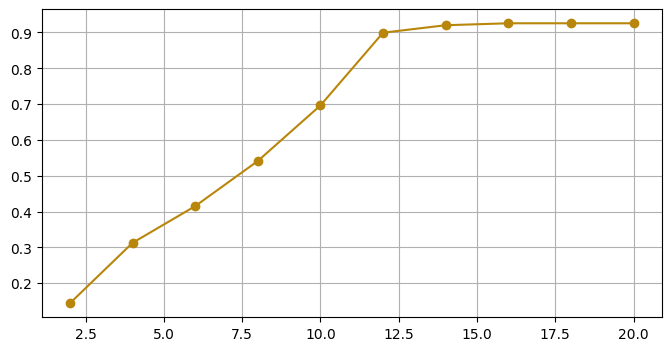

In [34]:
results = []
max_depth_options = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)

# plot 
plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkgoldenrod", marker="o")
plt.grid()

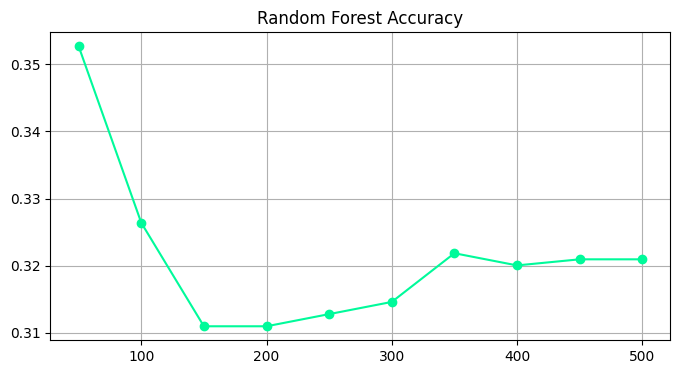

In [35]:
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

accuracy_results = []
auc_results = []

for trees in n_estimators:
    rf = RandomForestClassifier(n_estimators=trees, random_state=101)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    

    accuracy_results.append(accuracy)

# plot accuracy
plt.figure(figsize=(8,4))
pd.Series(accuracy_results, n_estimators).plot(color="mediumspringgreen", marker="o")
plt.title('Random Forest Accuracy')
plt.grid()

In [36]:
# calculating f1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score: %.3f' % f1)

F1 Score: 0.318


c:\Users\Kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

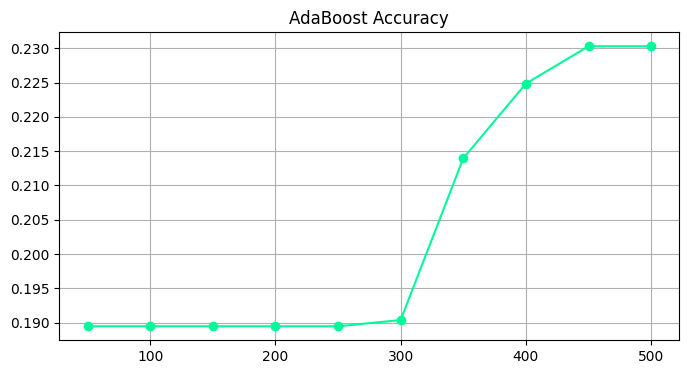

In [37]:
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

accuracy_results = []
auc_results = []

for trees in n_estimators:
    ab = AdaBoostClassifier(n_estimators=trees, random_state=101)
    ab.fit(x_train, y_train)
    y_pred = ab.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    

    accuracy_results.append(accuracy)

# plot accuracy
plt.figure(figsize=(8,4))
pd.Series(accuracy_results, n_estimators).plot(color="mediumspringgreen", marker="o")
plt.title('AdaBoost Accuracy')
plt.grid()

In [38]:
# calculating f1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score: %.3f' % f1)

F1 Score: 0.194


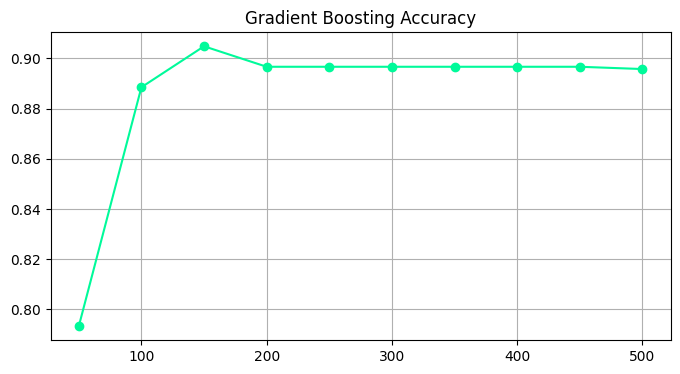

In [39]:
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

accuracy_results = []
auc_results = []

for trees in n_estimators:
    gb = GradientBoostingClassifier(n_estimators=trees, random_state=101)
    gb.fit(x_train, y_train)
    y_pred = gb.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    

    accuracy_results.append(accuracy)

# plot accuracy
plt.figure(figsize=(8,4))
pd.Series(accuracy_results, n_estimators).plot(color="mediumspringgreen", marker="o")
plt.title('Gradient Boosting Accuracy')
plt.grid()

In [40]:
# calculating f1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score: %.3f' % f1)

F1 Score: 0.889


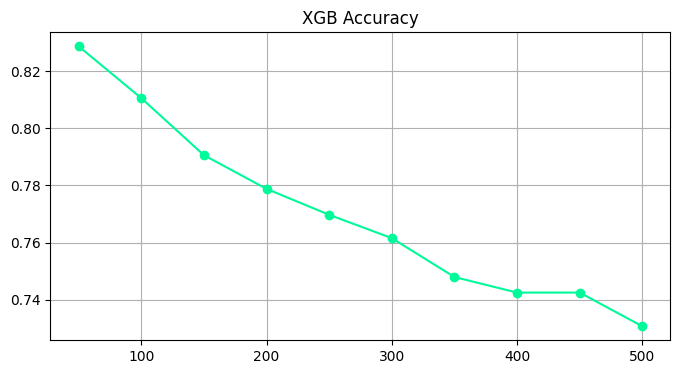

In [41]:
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

accuracy_results = []
auc_results = []

for trees in n_estimators:
    xgb = XGBClassifier(n_estimators=trees, random_state=101)
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    

    accuracy_results.append(accuracy)

# plot accuracy
plt.figure(figsize=(8,4))
pd.Series(accuracy_results, n_estimators).plot(color="mediumspringgreen", marker="o")
plt.title('XGB Accuracy')
plt.grid()

In [42]:
# calculating f1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score: %.3f' % f1)

F1 Score: 0.728


In [44]:
# choosing the best estimaor
gb = GradientBoostingClassifier(n_estimators=150, random_state=101)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)


print(accuracy)

0.9048050770625566


In [45]:
# calculating f1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score: %.3f' % f1)

F1 Score: 0.893
